# Kaggle House Prices EDA

## 1. Goal
This assignment requires learners to:
- Understand the process of data analysis using a real dataset
- Get familiar with handling missing values, correlation coefficients, and transformations

## Problem 1: Acquiring the dataset
Load `train.csv` into a Pandas DataFrame

In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv("train.csv")
print("Shape:", data.shape)
data.head()

Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Problem 2: Understanding the dataset
Kaggle's overview and Data Description provides a deeper understanding of the data.

Refer to the file names data_description.txt for variable/column definitions

## Problem 3: Checking the data
Check datatypes, summary, and the target variable (`SalePrice`).

In [3]:
# Info (datatypes, null counts)
data.info()

# Target variable overview
print("SalePrice distribution:")
print(data['SalePrice'].describe())

# Summary statistics for numeric features
data.describe().T.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0


## Problem 4: Dealing with missing values
Check for missing values and visualize them. Then:
- Drop features with ≥5 missing values
- Drop rows with remaining missing values

<Axes: >

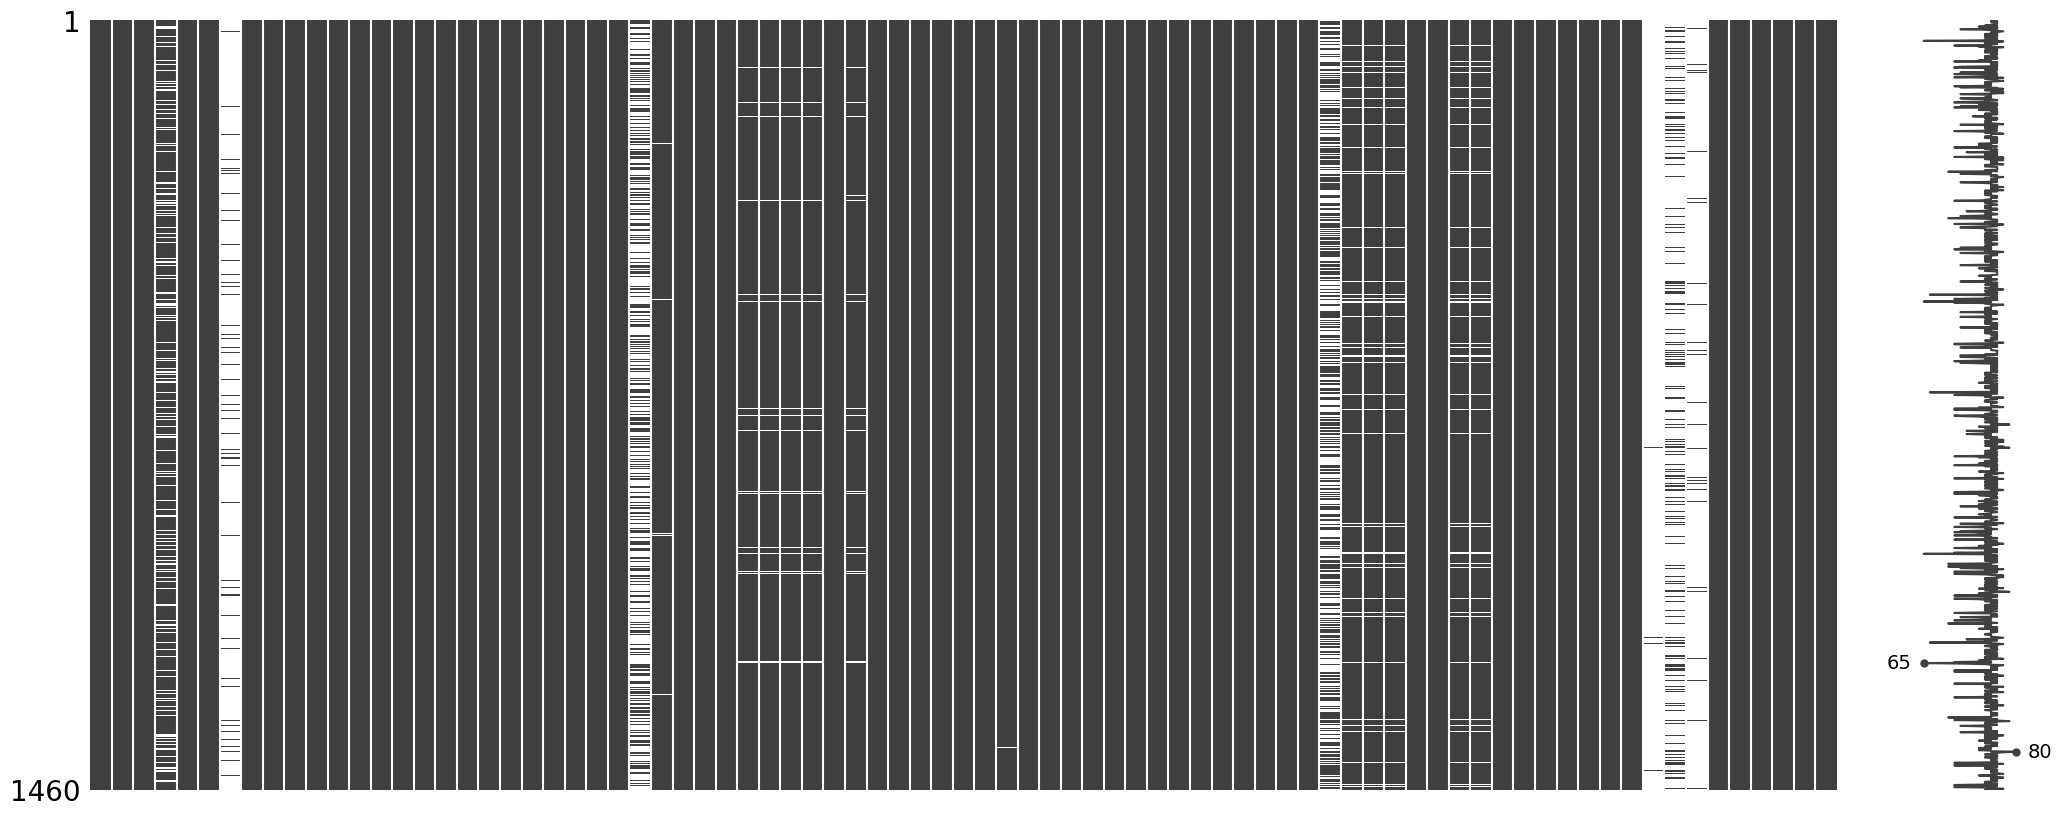

In [4]:
import missingno as msno #recommended in course content

# Visualize missing values
msno.matrix(data)

In [5]:
# Missing ratio calculation
missing_ratio = data.isnull().sum() / len(data)
missing_ratio = missing_ratio[missing_ratio > 0].sort_values(ascending=False)
print("Missing ratios:")
print(missing_ratio.head(20))

Missing ratios:
PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64


In [6]:
# Drop features with >=5 missing values
data_reduced = data.dropna(axis=1, thresh=len(data)-5)

# Drop remaining rows with missing values
data_reduced = data_reduced.dropna()

print("Shape before:", data.shape)
print("Shape after:", data_reduced.shape)

Shape before: (1460, 81)
Shape after: (1459, 63)


## Problem 6: Target variable distribution
Visualize distribution of `SalePrice` before and after log transformation.  
Compute kurtosis and skewness for both.


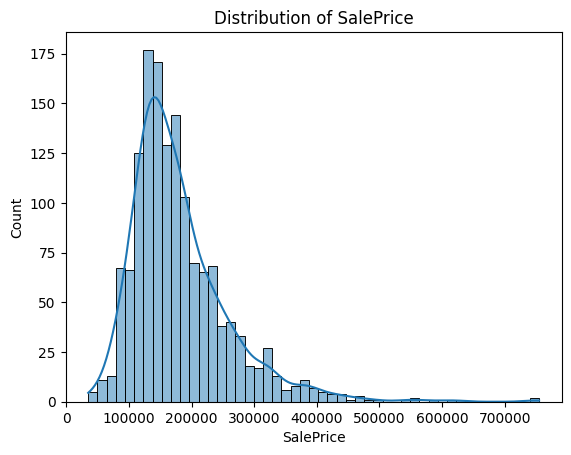

Kurtosis: 6.529263049673958
Skewness: 1.8819429948035529


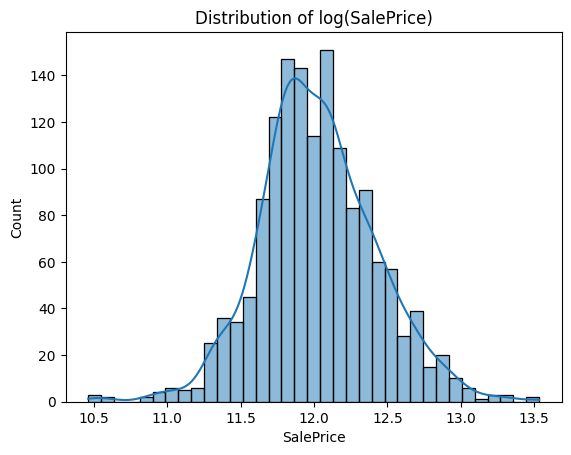

Kurtosis (log): 0.806927847502148
Skewness (log): 0.12131775882415026


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Original distribution
sns.histplot(data_reduced['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

print("Kurtosis:", data_reduced['SalePrice'].kurtosis())
print("Skewness:", data_reduced['SalePrice'].skew())

# Log transform
log_price = np.log(data_reduced['SalePrice'])
sns.histplot(log_price, kde=True)
plt.title("Distribution of log(SalePrice)")
plt.show()

print("Kurtosis (log):", log_price.kurtosis())
print("Skewness (log):", log_price.skew())

## Problem 7: Checking correlation coefficients
Compute correlation matrix and display:
- Full heatmap
- Top 10 features most correlated with SalePrice

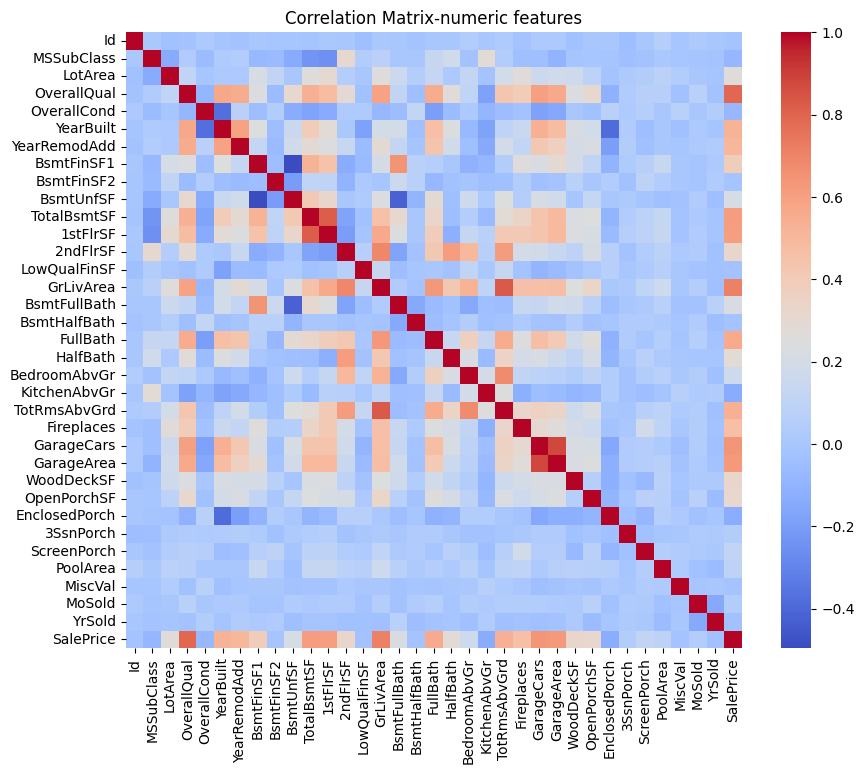

In [11]:
# Correlation matrix
corr = data_reduced.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Matrix-numeric features")
plt.show()

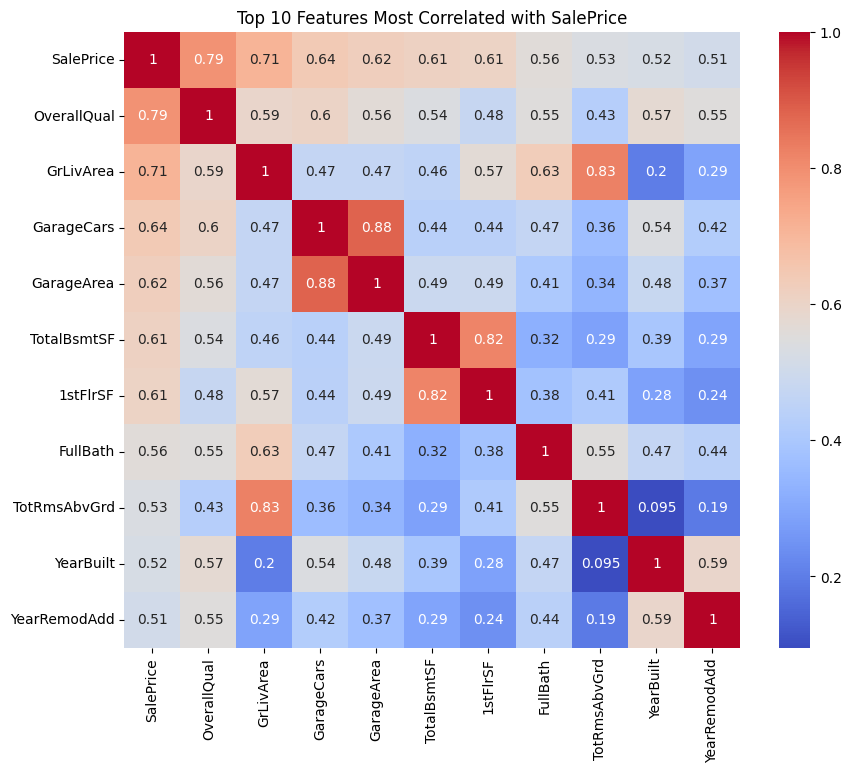

Top 10 correlated features with SalePrice:
SalePrice       1.000000
OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
YearRemodAdd    0.507430
Name: SalePrice, dtype: float64


In [13]:
# Top 10 correlations with SalePrice
top10_corr = corr['SalePrice'].abs().sort_values(ascending=False).head(11).index # 11 because the first one is going to be SalePrice

plt.figure(figsize=(10, 8))
sns.heatmap(data_reduced[top10_corr].corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Top 10 Features Most Correlated with SalePrice")
plt.show()

print("Top 10 correlated features with SalePrice:")
print(corr['SalePrice'].abs().sort_values(ascending=False).head(11))